<a href="https://colab.research.google.com/github/Aleksanderprofic/Machine-Learning/blob/master/Regression/SupportVectorRegression/sklearn/support_vector_regression_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression

## Data loading and data visualisation <a name="dladv"></a>



### Data loading <a name="dl"></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Data Visualisation

#### Position Level vs Salary

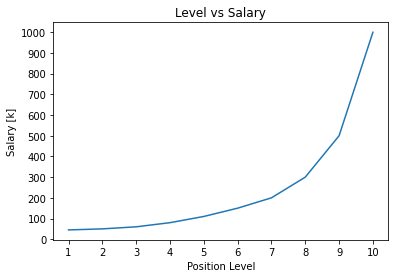

In [40]:
plt.plot(dataset.Level, dataset.Salary / 1000)
plt.title('Level vs Salary')
plt.xlabel('Position Level')
plt.yticks(range(0, 1001, 100))
plt.xticks(range(1, 11))
plt.ylabel('Salary [k]')
plt.show()

In [41]:
dataset.Level.corr(dataset.Salary)

0.8179494074776199

*Strong Correlation between Level and Salary*

## Data preprocessing <a name="dp"></a>

### Extracting dependent and independent variables <a name="edaiv"></a>

In [42]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [43]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [44]:
y = y.reshape(-1, 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

### Feature scaling

#### Using scaler

In [45]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [46]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [49]:
y = y.reshape(y.shape[0],)
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

## Training and results visualisation

### Training the SVR model on the whole Training set

In [50]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting a result for Level = 6.5

In [51]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

### Visualising the SVR results

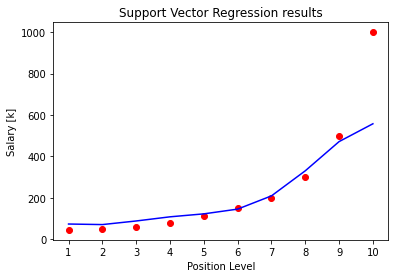

In [52]:
plt.title('Support Vector Regression results')
plt.xlabel('Position Level')
plt.ylabel('Salary [k]')
plt.xticks(range(11))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y) / 1000, color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)) / 1000, color='blue')
plt.show()

### Visualising the SVR results (for higher resolution and smoother curve)

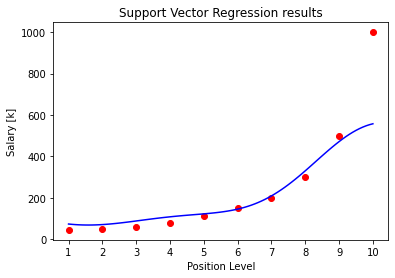

In [53]:
X_smoother = np.arange(1, 10.1, 0.1).reshape(-1, 1)

plt.title('Support Vector Regression results')
plt.xlabel('Position Level')
plt.ylabel('Salary [k]')
plt.xticks(range(11))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y) / 1000, color='red')
plt.plot(X_smoother, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_smoother))) / 1000, color='blue')
plt.show()